In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
import sys
sys.path.append("/Users/bl/Dropbox/software/bpz-1.99.3")
from bpz_tools import *

60.6682693169 60.6675206695 20.204812946 20.2225583438
419.843221631 419.84003542 139.77454845 139.947740544
550.231734068 550.004576533 183.063391689 183.409565456
443.85137154 443.848175133 147.810959016 147.95045717
88.8665558668 88.862141606 29.5270786131 29.6221852889
(5, 8) (5, 8) (5, 8)


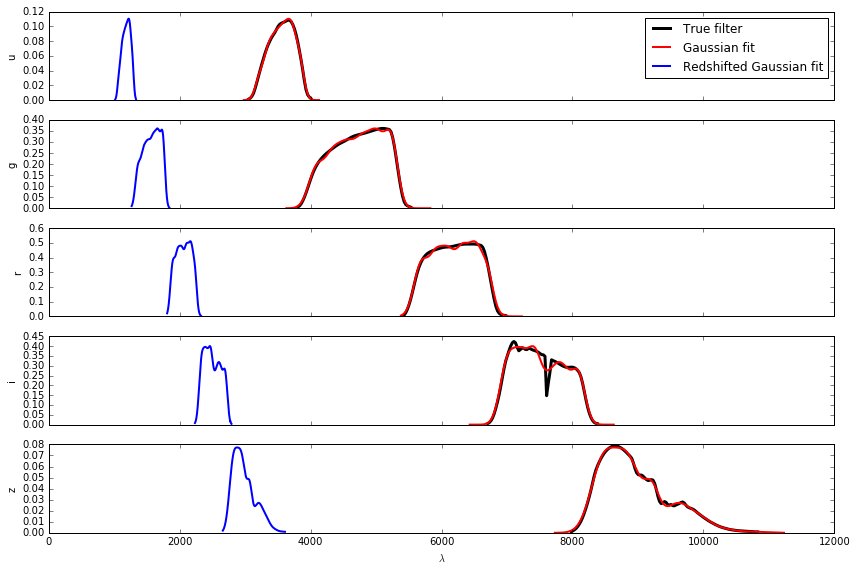

In [7]:
ab_filters = ['u', 'g', 'r', 'i', 'z']
numCoefs = 8
numBands = len(ab_filters)
max_redshift = 2.0
tabulatedfilter = [np.genfromtxt('/Users/bl/Dropbox/software/bpz-1.99.3/FILTER/'+band+'.res') for band in ab_filters]

fig, axs = plt.subplots(5, 1, figsize=(12, 8), sharex=True)
axs = axs.ravel()
mu_arr = np.zeros((len(ab_filters), numCoefs))
sig_arr = np.zeros((len(ab_filters), numCoefs))
amp_arr = np.zeros((len(ab_filters), numCoefs))
lambdaMinMax_arr = np.zeros((len(ab_filters), 2))
for i, (band, data) in enumerate(zip(ab_filters, tabulatedfilter)):
    x, y = data[:,0], data[:,1]
    ind = np.where(y > 0.01*np.max(y))[0]
    lambdaMin, lambdaMax = x[ind[0]], x[ind[-1]]
    lambdaMinMax_arr[i,:] = lambdaMin, lambdaMax
    sig0 = np.repeat((lambdaMax-lambdaMin)/numCoefs/4, numCoefs)
    mus = np.linspace(lambdaMin+sig0[0], lambdaMax-sig0[-1], num=numCoefs)
    amp0 = interp1d(x, y)(mus)
    p0 = np.concatenate((amp0, sig0))
    def func(p, x, muarr):
        y = 0*x
        n = p.size/2
        for i in range(n):
            y += np.abs(p[i]) * np.exp(-0.5*((muarr[i]-x)/np.abs(p[n+i]))**2.0)
        return y
    def gaussian(x, amparr, muarr, sigarr):
        y = 0*x
        n = amparr.size
        for i in range(n):
            y += np.abs(amparr[i]) * np.exp(-0.5*((muarr[i]-x)/np.abs(sigarr[i]))**2.0)
        return y
    def dfunc(p, x, yd):
        y = 0*x
        n = p.size/2
        for i in range(n):
            y += np.abs(p[i]) * np.exp(-0.5*((mus[i]-x)/np.abs(p[n+i]))**2.0)
        return yd - y
    popt, pcov = scipy.optimize.leastsq(dfunc, p0, args=(x, y))
    amps = np.abs(popt[0:numCoefs])
    sigs = np.abs(popt[numCoefs:2*numCoefs])
    mu_arr[i,:] = mus
    amp_arr[i,:] = amps
    sig_arr[i,:] = sigs
    axs[i].plot(x[ind], y[ind], lw=3, label='True filter', c='k')
    #axs[i].errorbar(mus, amps, xerr=sigs, color='g')
    yy = func(popt, x, mus)
    axs[i].plot(x, yy, lw=2, c='r', label='Gaussian fit')
    
    popt_redshifted = 1*popt
    popt_redshifted[numCoefs:2*numCoefs] /= (1. + max_redshift) 
    mus_redshifted = 1*mus / (1. + max_redshift) 
    lambdaMin_redshifted, lambdaMax_redshifted = lambdaMin / (1. + max_redshift) , lambdaMax / (1. + max_redshift) 
    xf = np.linspace(lambdaMin_redshifted, lambdaMax_redshifted, num=1000)
    yf = func(popt_redshifted, xf, mus_redshifted)
    axs[i].plot(xf, yf, lw=2, c='b', label='Redshifted Gaussian fit')
    axs[i].set_ylabel(band)
    axs[-1].set_xlabel('$\lambda$')
    norm = np.sum([amp*np.sqrt(2*np.pi)*sig for amp, sig in zip(amps,sigs)])
    norm_redshifted = np.sum([amp*np.sqrt(2*np.pi)*sig for amp, sig in zip(amps, popt_redshifted[numCoefs:2*numCoefs])])
    print norm, scipy.integrate.simps(yy, x), scipy.integrate.simps(yf, xf), norm_redshifted
axs[0].legend(loc='upper right')
fig.tight_layout()

np.savetxt('filter_gaussian_coefficients_amp_'+''.join(ab_filters)+'.txt', amp_arr)
np.savetxt('filter_gaussian_coefficients_mu_'+''.join(ab_filters)+'.txt', mu_arr)
np.savetxt('filter_gaussian_coefficients_sig_'+''.join(ab_filters)+'.txt', sig_arr)

0
0
0
12
57
72
0
0
offset 301 (301, 2) (301,)
(141,)
[ 1740.  1984.  2000.  2004.  2012.  2016.  2024.  2032.  2044.  2056.
  2068.  2076.  2080.  2084.  2092.  2100.  2116.  2136.  2140.  2160.
  2188.  2204.  2236.  2244.  2264.  2280.  2284.  2300.  2312.  2324.
  2332.  2336.  2356.  3172.  3176.  3180.  3200.  3252.  3372.  3376.
  3720.  3720.  3724.  3724.  3724.  3728.  3728.  3728.  3732.  3732.
  3736.  3736.  3740.  3740.  3744.  3868.  4340.  4856.  4856.  4860.
  4860.  4864.  4868.  4872.  4876.  4952.  4956.  4960.  4964.  4968.
  4972.  4976.  5000.  5004.  5004.  5008.  5008.  5012.  5012.  5016.
  5016.  5020.  5020.  5024.  5024.  5028.  6540.  6544.  6548.  6548.
  6552.  6552.  6556.  6556.  6560.  6560.  6564.  6564.  6568.  6572.
  6572.  6576.  6576.  6580.  6580.  6584.  6584.  6588.  6592.  6596.
  6600.  6604.  6708.  6712.  6712.  6716.  6716.  6720.  6724.  6724.
  6728.  6728.  6732.  6736.  6740.  7256.  9060.  9064.  9068.  9072.
  9224.  9228.  9232.  9

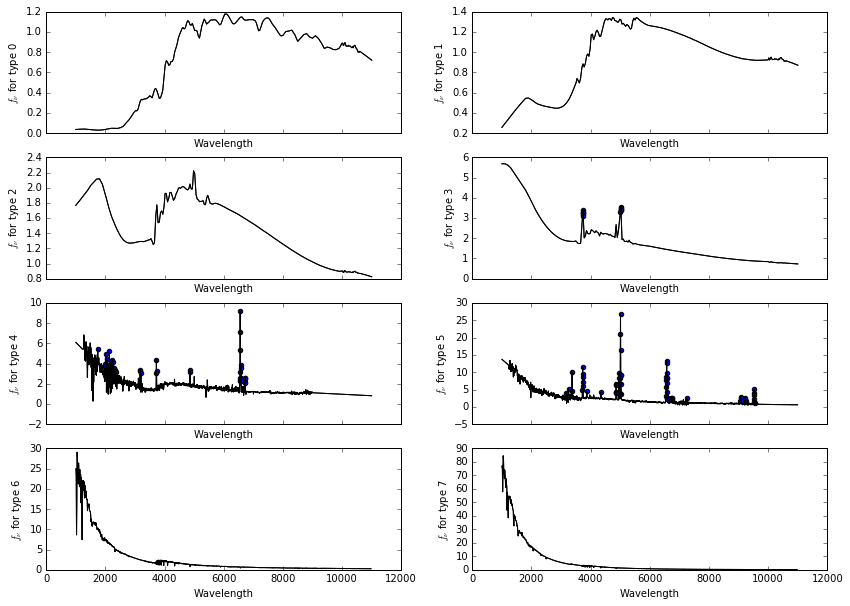

In [8]:
template_names = ['El_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'Im_B2004a', 'SB3_B2004a', 'SB2_B2004a', 'ssp_25Myr_z008', 'ssp_5Myr_z008']
sed_interp = []
lambdaMinAbs, lambdaMaxAbs = 1e3, 1.1e4
lambdaRef = 4.5e3
wavelengths = np.linspace(lambdaMinAbs, lambdaMaxAbs, num=20)

X = np.zeros((6000, 2))
Y = np.zeros((X.shape[0], ))
X_nolines = np.zeros((wavelengths.size*len(template_names), 2))
Y_nolines = np.zeros((X_nolines.shape[0], ))

fig, axs = plt.subplots(4, 2, figsize=(14, 10), sharex=True, sharey=False)
axs = axs.ravel()
off = 0
lines_mu = []
for it, template_name in enumerate(template_names):
    data = np.genfromtxt('/Users/bl/Dropbox/software/bpz-1.99.3/SED/'+template_name+'.sed')
    ind = np.logical_and(data[:,0] >= lambdaMinAbs, data[:,0] <= lambdaMaxAbs)
    ref = 1 #np.interp(lambdaRef, data[ind,0], data[ind,1])
    axs[it].plot(data[ind,0], data[ind,1] / ref, 'k')
    theint = np.interp(wavelengths, data[ind,0], data[ind,1] / ref)
    axs[it].set_xlabel('Wavelength')
    axs[it].set_ylabel(r'$f_{\nu}$ for type '+str(it))
    sed_interp.append(scipy.interpolate.interp1d(wavelengths, theint))
    sel = np.where(ind)[0][::1]
    axs[it].plot(data[sel,0], data[sel,1], 'k')
    
    tn = wavelengths.size
    X_nolines[tn*it:tn*(it+1),0] = it
    X_nolines[tn*it:tn*(it+1),1] = wavelengths
    Y_nolines[tn*it:tn*(it+1)] = theint
    X[off:off+tn,0] = it
    X[off:off+tn,1] = wavelengths
    Y[off:off+tn] = theint
    off += tn

    diff = (data[sel,1] - sed_interp[it](data[sel,0]))
    locs = np.argsort(diff)[::-1][0:]
    locs = locs[(1-sed_interp[it](data[sel[locs],0])/data[sel[locs],1]) > 0.4]
    print sel[locs].size
    lines_mu.extend(data[sel[locs],0])
    axs[it].scatter(data[sel[locs],0], data[sel[locs],1])
    tn = sel[locs].size
    if tn > 0:
        X[off:off+tn,0] = it
        X[off:off+tn,1] = data[sel[locs],0]
        Y[off:off+tn] = data[sel[locs],1]
        off += tn
        
X = X[:off,:]
Y = Y[:off]
print 'offset', off, X.shape, Y.shape
fig.savefig('CWW_templates.pdf')
lines_mu = np.array(lines_mu)
lines_sig = 0*lines_mu + 10.0
ii = lines_mu.argsort()
print lines_mu.shape
print lines_mu[ii]

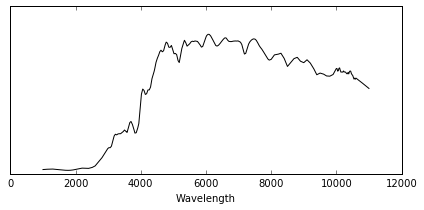

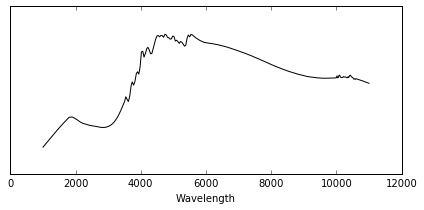

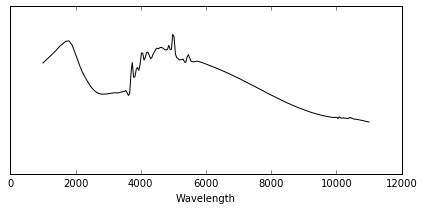

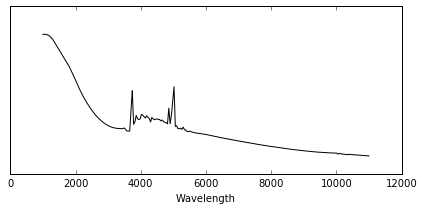

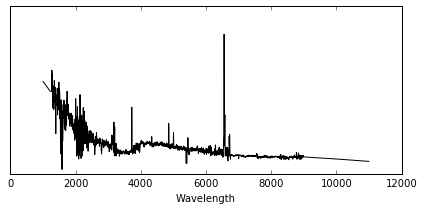

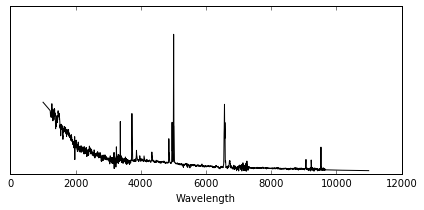

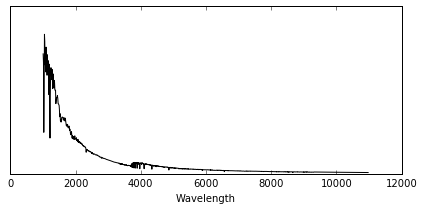

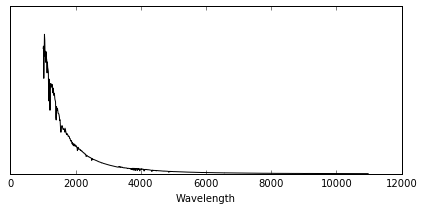

In [23]:
for it, template_name in enumerate(template_names):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    data = np.genfromtxt('/Users/bl/Dropbox/software/bpz-1.99.3/SED/'+template_name+'.sed')
    ind = np.logical_and(data[:,0] >= lambdaMinAbs, data[:,0] <= lambdaMaxAbs)
    ax.plot(data[ind,0], data[ind,1], 'k')
    ax.set_ylim([0, np.max(data[ind,1])*1.2])
    ax.set_yticks([])
    ax.set_xlabel('Wavelength')
    fig.tight_layout()
    fig.savefig('pics/Template_'+str(it)+'.pdf')

In [18]:
redshiftGrid = np.linspace(0, max_redshift, num=30)
    
nt = len(template_names)
nf = len(ab_filters)
nz = redshiftGrid.size
f_mod = np.zeros((nz, nt, nf))*0.
f_mod2 = np.zeros((nz, nt, nf))*0.
f_mod_interps = np.zeros((nt, nf), dtype=object)
f_mod_interps2 = np.zeros((nt, nf), dtype=object)
abfiles = []
for iz in range(nz):
    oneplusz = (redshiftGrid[iz] + 1)
    for jf in range(nf):
        lambdaMin, lambdaMax = lambdaMinMax_arr[jf,:]
        xf = np.linspace(lambdaMin/oneplusz, lambdaMax/oneplusz, num=100)
        yf = gaussian(xf, amp_arr[jf,:], mu_arr[jf,:]/oneplusz, sig_arr[jf,:]/oneplusz)
        norm = np.trapz(yf, x=xf)
        for it in range(nt):
            ysed = sed_interp[it](xf)
            f_mod2[iz,it,jf] = np.trapz(ysed*yf, x=xf) / norm
            
for it in range(nt):         
    for jf in range(nf):                            
        f_mod[:,it,jf] = lf_z_sed(template_names[it], ab_filters[jf], z=redshiftGrid, ccd='yes', units='lambda', madau='yes')

np.save('CWW_redshiftgrid_zmax'+str(max_redshift)+''.join(ab_filters)+'.npy', f_mod)
np.save('CWW_redshiftgrid_zmax'+str(max_redshift)+''.join(ab_filters)+'_nolines.npy', f_mod2)

for jf in range(nf):                            
    for it in range(nt):
        f_mod_interps[it, jf] = scipy.interpolate.interp1d(redshiftGrid, f_mod[:,it,jf], kind='cubic')
        f_mod_interps2[it, jf] = scipy.interpolate.interp1d(redshiftGrid, f_mod2[:,it,jf], kind='cubic')

In [112]:
lines_mu = np.array([ 3732.22, 5002.26, 1392.07, 1542.91, 2009.82, 2384.11, 2795.42, 3174.70, 4858.05, 5401.32, 6292.06, 6556.74, 6719.12, 8775.69, 3253.81, 3372.75, 3528.47, 3870.62, 4104.03, 4343.24, 5308.43, 6853.21, 7027.87, 7134.49, 7227.85, 9065.54, 9230.14, 9527.33, 9603.17, 1213.04, 3835.44, 3969.87 ])
lines_sig = np.array([ 23.11, 34.10, 6.41, 5.58, 22.81, 2.63, 11.14, 3.90, 3.68, 11.83, 3.18, 4.39, 10.70, 6.77, 5.33, 2.14, 4.74, 9.18, 7.03, 8.57, 4.43, 2.49, 11.83, 3.84, 3.13, 4.99, 4.52, 5.01, 5.04, 8.20, 2.46, 2.93 ])
print lines_mu.size, lines_sig.size

32 32


In [9]:
from photoz_kernels import *

alpha_C = 1e3
alpha_L = 1e2
alpha_T = 0.9
V_C = 100
V_L = 10
klt = SEDRBF(lines_mu, lines_sig, V_C, V_L, alpha_C, alpha_L, alpha_T)
#klt.change_numlines(5)
m_rbf_nolines = GPy.models.GPRegression(X_nolines, Y_nolines[:,None], klt)
m_rbf_nolines.kern.alpha_T.constrain_bounded(0, 1.5)
m_rbf_nolines.kern.V_C.constrain_bounded(10, 2e3)
m_rbf_nolines.kern.alpha_C.constrain_bounded(5e3, 1e5)
m_rbf_nolines.likelihood.variance.fix(0.1)
m_rbf_nolines.kern.V_L.fix(V_L)
m_rbf_nolines.kern.alpha_L.fix(alpha_L)
m_rbf_nolines.optimize('bfgs', messages=True)

m_rbf = GPy.models.GPRegression(X, Y[:,None], klt)
m_rbf.kern.alpha_T.fix(m_rbf_nolines.kern.alpha_T)
m_rbf.kern.alpha_C.fix(m_rbf_nolines.kern.alpha_C)
m_rbf.kern.V_C.fix(m_rbf_nolines.kern.V_C)
m_rbf.kern.V_L.constrain_bounded(10, 1e3)
m_rbf.kern.alpha_L.constrain_bounded(1e2, 2e3)
m_rbf.optimize('bfgs', messages=True)

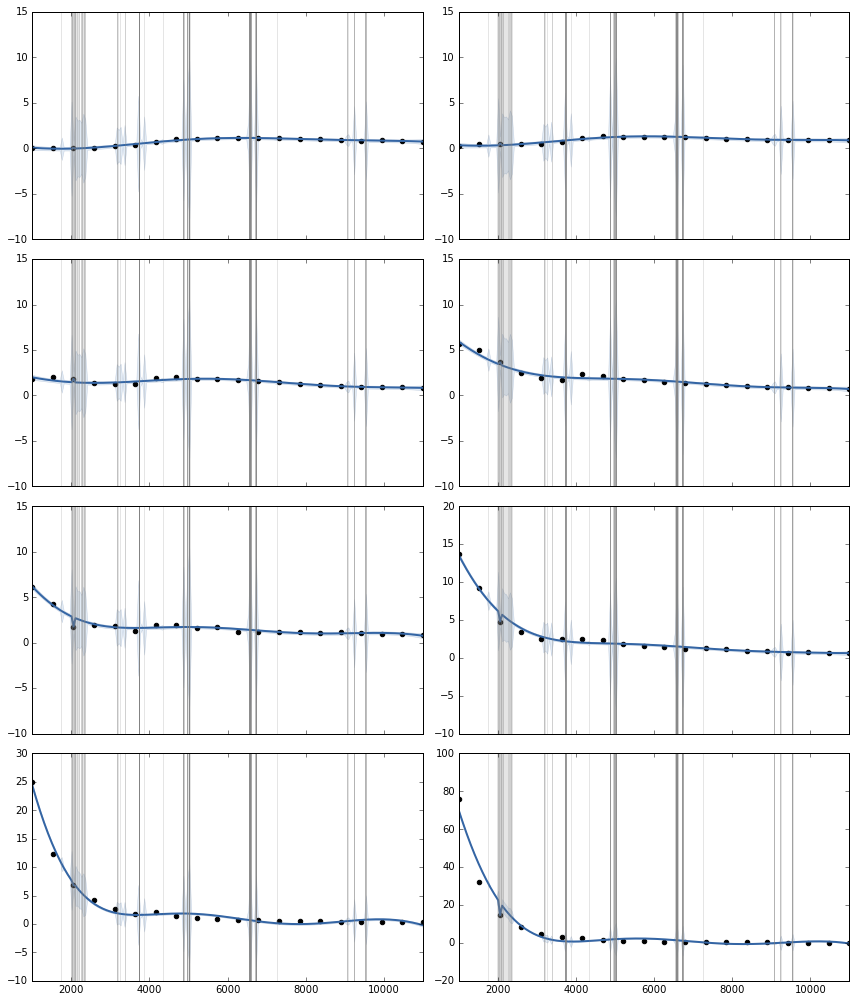

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(12, 14), sharex=True, sharey=False)
axs = axs.ravel()
xlamb = np.linspace(lambdaMinAbs, lambdaMaxAbs, num=1000)
for t in range(8):
    ind = np.where(X_nolines[:,0].astype(int) == t)[0]
    m_rbf_nolines.plot_f(fixed_inputs=[(0,t)], ax=axs[t], legend=False, resolution=200, samples=0,
            plot_limits=[lambdaMinAbs, lambdaMaxAbs], 
                  plot_data=False, plot_inducing=False, plot_density=False, 
                  lower=16, upper=84)#, lower=2.5, upper=97.5)
    axs[t].scatter(X_nolines[ind,1], Y_nolines[ind], color='k') 
    for mu, sig in zip(m_rbf.kern.lines_mu, m_rbf.kern.lines_sig):
        axs[t].axvline(mu, color='gray', alpha=0.2)
        #axs[t].axvspan(mu-2*sig, mu+2*sig, color='gray', alpha=0.5)
fig.tight_layout()

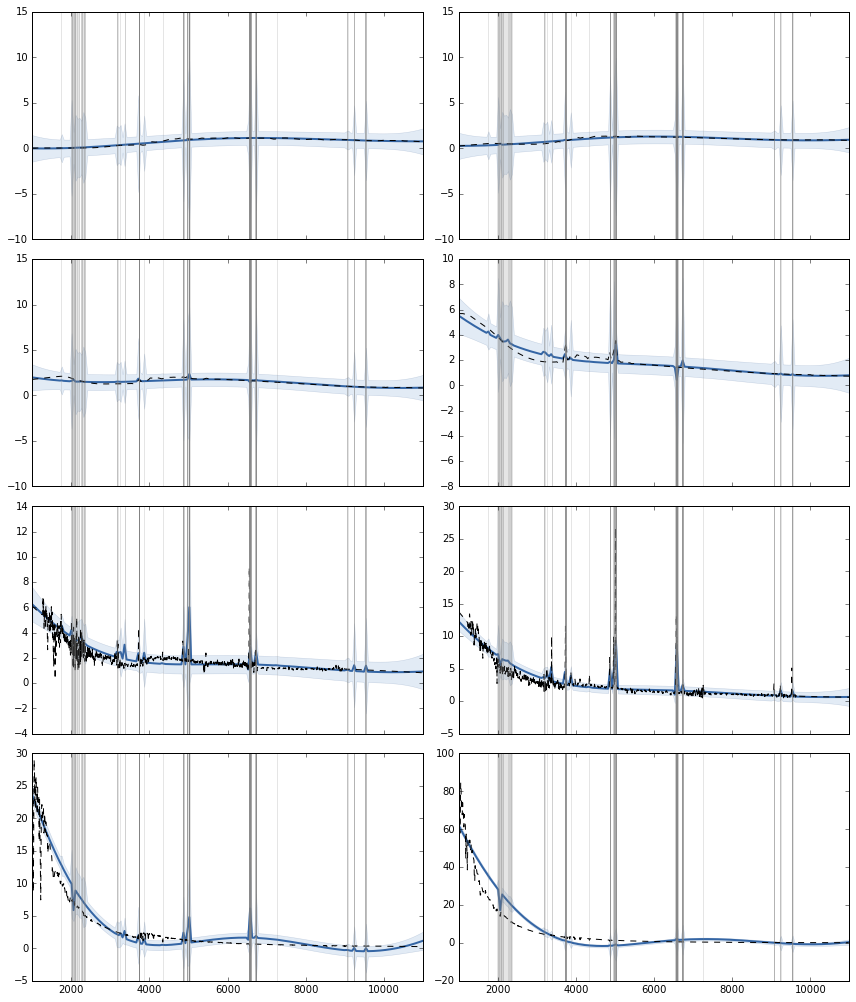

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(12, 14), sharex=True, sharey=False)
axs = axs.ravel()
xlamb = np.linspace(lambdaMinAbs, lambdaMaxAbs, num=1000)
for t in range(8):
    ind = np.where(X[:,0].astype(int) == t)[0]
    #axs[t].plot(xlamb, sed_interp[t](xlamb), color='k')
    m_rbf.plot_f(fixed_inputs=[(0,t)], ax=axs[t], legend=False, resolution=200, samples=0,
            plot_limits=[lambdaMinAbs, lambdaMaxAbs], 
                  plot_data=False, plot_inducing=False, plot_density=False, 
                  lower=16, upper=84)#, lower=2.5, upper=97.5)
    #axs[t].scatter(X[ind,1], Y[ind], color='k') 
    data = np.genfromtxt('/Users/bl/Dropbox/software/bpz-1.99.3/SED/'+template_names[t]+'.sed')
    ind = np.logical_and(data[:,0] >= lambdaMinAbs, data[:,0] <= lambdaMaxAbs)
    axs[t].plot(data[ind,0], data[ind,1], color='k', ls='dashed') 
    for mu, sig in zip(m_rbf.kern.lines_mu, m_rbf.kern.lines_sig):
        axs[t].axvline(mu, color='gray', alpha=0.2)
        #axs[t].axvspan(mu-2*sig, mu+2*sig, color='gray', alpha=0.5)
fig.tight_layout()

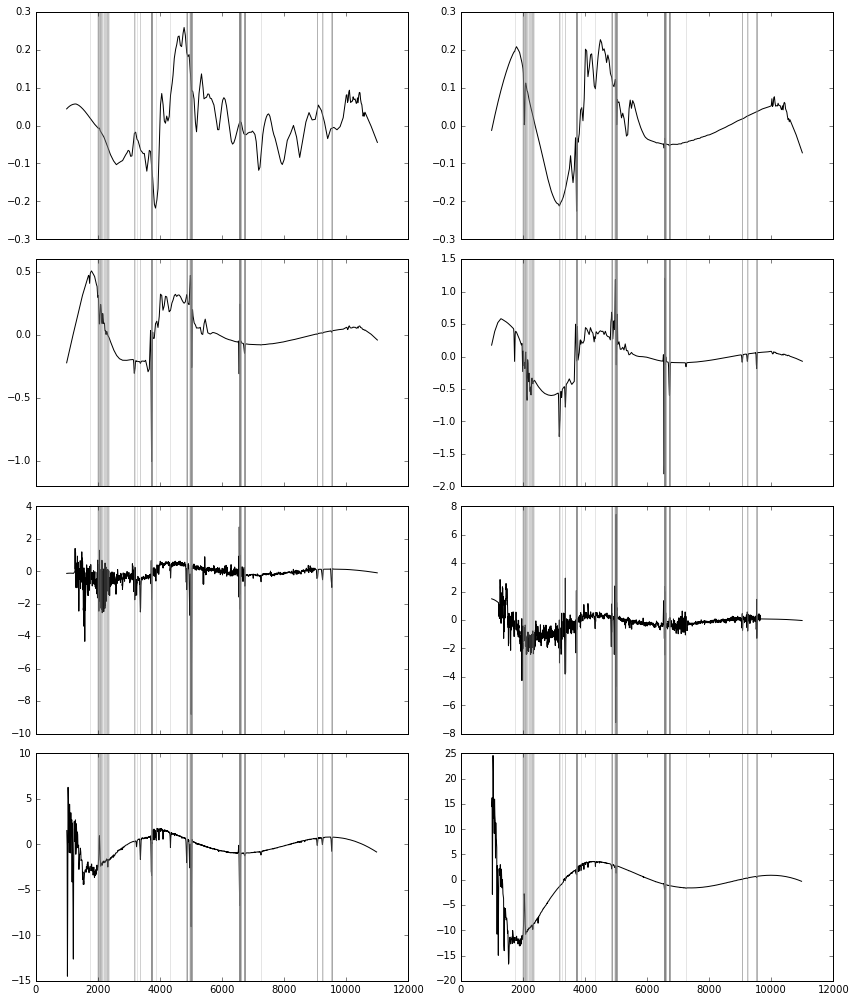

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(12, 14), sharex=True, sharey=False)
axs = axs.ravel()
xlamb = np.linspace(lambdaMinAbs, lambdaMaxAbs, num=1000)
for t in range(8):
    data = np.genfromtxt('/Users/bl/Dropbox/software/bpz-1.99.3/SED/'+template_names[t]+'.sed')
    ind = np.logical_and(data[:,0] >= lambdaMinAbs, data[:,0] <= lambdaMaxAbs)
    Xb = np.vstack((0*data[ind,0]+t, data[ind,0])).T
    mu, C = m_rbf.predict(Xb[:,:], full_cov=False)
    axs[t].plot(data[ind,0], data[ind,1] - mu.flatten(), color='k') 
    for mu, sig in zip(m_rbf.kern.lines_mu, m_rbf.kern.lines_sig):
        axs[t].axvline(mu, color='gray', alpha=0.2)
        #axs[t].axvspan(mu-2*sig, mu+2*sig, color='gray', alpha=0.5)
fig.tight_layout()

In [163]:
num = 6
numpoints = num*nt
#redshifts = np.random.uniform(low=0, high=max_redshift, size=numpoints)
redshifts = np.outer(np.linspace(0, max_redshift, num=num), np.ones(nt)).T.flatten()
#types = np.random.randint(low=0, high=nt, size=numpoints)
types = np.outer(np.ones(num), np.arange(nt)).T.flatten()
#redshifts[:] = 0.5
nd = nf*numpoints
X = np.zeros((nd, 3))
Ytruth = np.zeros((nd, ))
Ynoise = np.zeros((nd, ))
Y = np.zeros((nd, ))
off = 0
Ynoisevarianceval = 0.01
for ip in range(numpoints):
    for jf in range(nf):
        X[off, 0] = types[ip]
        X[off, 1] = jf
        X[off, 2] = redshifts[ip]
        Ytruth[off] = f_mod_interps[types[ip], jf](redshifts[ip])
        Ynoise[off] = Ynoisevarianceval
        Y[off] = Ytruth[off] + Ynoise[off] * np.random.randn()
        off += 1

 /Users/bl/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future


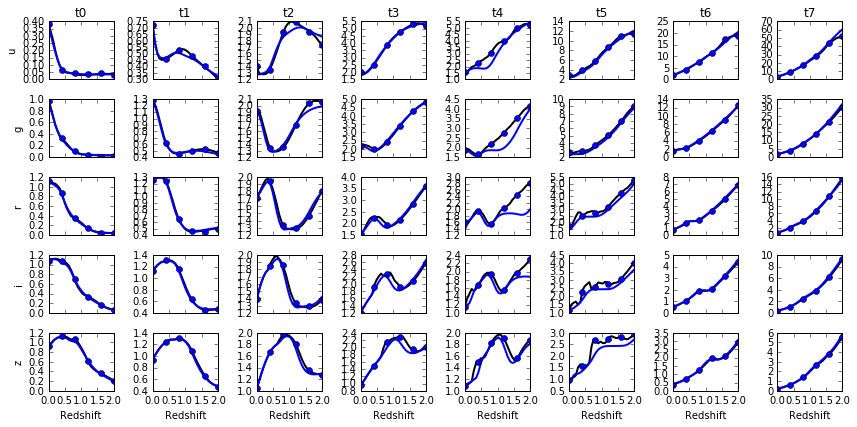

In [164]:
fig, axs = plt.subplots(5, len(template_names), figsize=(12, 6), sharex=True, sharey=False)
for bi in range(numBands):
    for t in range(len(template_names)):
        #axs[bi,t].plot(redshiftGrid, -2.5*np.log10(f_mod[:,t,bi+1]/f_mod[:,t,bi]), ls='solid', lw=2)
        axs[bi,t].plot(redshiftGrid, f_mod[:,t,bi], ls='solid', c='k', lw=2)
        axs[bi,t].plot(redshiftGrid, f_mod2[:,t,bi], ls='solid', c='b', lw=2)
        ind = np.logical_and(X[:,0].astype(int) == t, X[:,1].astype(int) == bi) 
        axs[bi,t].errorbar(X[ind,2], Y[ind], yerr=Ynoise[ind], fmt='o') 
        #axs[bi,t].scatter(X[ind,2], Ytruth[ind])
        if t == 0:
            axs[bi,t].set_ylabel(ab_filters[bi])
            #axs[bi,t].set_ylabel(ab_filters[bi+1]+' - '+ab_filters[bi])
        if bi == numBands - 1:
            axs[bi,t].set_xlabel('Redshift')
        if bi == 0:
            axs[bi,t].set_title('t'+str(t)) # template_names[t])
        
fig.tight_layout()

In [198]:
lines_amp = np.array([ 5.99, 5.29, 4.02, 2.37, 2.20, 1.17, 1.13, 1.03, 1.00, 0.96, 0.89, 0.77, 0.73, -0.65, 0.60, 0.60, -0.57, 0.56, -0.51, 0.50, 0.50, 0.47, -0.47, -0.43, -0.39, 0.38, 0.38, -0.37, 0.37, -0.36, -0.35, 0.35 ])
lines_mu = np.array([ 6556.74, 9527.33, 3372.75, 9065.54, 9230.14, 7134.49, 3174.70, 7227.85, 3253.81, 6719.12, 4858.05, 3870.62, 5002.26, 1213.04, 3732.22, 6853.21, 1542.91, 4343.24, 1392.07, 2009.82, 3528.47, 7027.87, 3969.87, 3835.44, 5401.32, 6292.06, 9603.17, 2795.42, 4104.03, 2384.11, 5308.43, 8775.69 ])
lines_sig = np.array([ 4.39, 5.01, 2.14, 4.99, 4.52, 3.84, 3.90, 3.13, 5.33, 10.70, 3.68, 9.18, 34.10, 8.20, 23.11, 2.49, 5.58, 8.57, 6.41, 22.81, 4.74, 11.83, 2.93, 2.46, 11.83, 3.18, 5.04, 11.14, 7.03, 2.63, 4.43, 6.77 ])

In [210]:
alpha_C = 1e3
alpha_L = 1e2
alpha_T = 0.2
V_C = 0.1
V_L = 0.1

k = Photoz(amp_arr, mu_arr, sig_arr, lines_mu, lines_sig, V_C, V_L, alpha_C, alpha_L, alpha_T)

k.change_numlines(0)

numit = 2
t1 = time()
for i in range(numit):
    a = k.K_slow(X)
    #print a
t2 = time()
for i in range(numit):
    a = k.K(X)
    #print a
t3 = time()
print (t2-t1)/numit, (t3-t2)/numit, (t2-t1)/(t3-t2)

m_full = GPy.models.GPRegression(X, Y[:,None], k)
m_full.constrain_positive('*')
m_full.kern.V_C.constrain_bounded(1e2, 1e5)
m_full.kern.V_L.fix()
m_full.kern.alpha_T.constrain_bounded(0.2, 2)
m_full.kern.alpha_C.constrain_bounded(2e3, 1e5)
m_full.kern.alpha_L.fix()
m_full.likelihood.variance.fix(Ynoisevarianceval)

0.210585474968 0.0467865467072 4.50098350464


array([0])